Jacqueline Sanchez <br>
June 25, 2024 <br> 
Homework 4

# Neural Networks

Your task for this homework will be to construct a neural network for both a regression
and classification task. We'll be using the california dataset for the regression portion,
and iris for classification.By the end of this hw you should be comfortable using sklearn'sneural network on a dataset.

In [40]:
# dataset importation
from sklearn.datasets import fetch_california_housing, load_iris

# libraries 
import pandas as pd
import numpy as np


# plotting tools
import seaborn as sns # to use rcParams
import matplotlib.pyplot as plt

# tools
from sklearn.pipeline import Pipeline

# model training tools
from sklearn.model_selection import train_test_split, GridSearchCV # split 
from sklearn.preprocessing import StandardScaler # scale, preprocessing

# models
from sklearn.neural_network import MLPRegressor # for neural network (new)


# metric tools
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from matplotlib import rcParams # need sb
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

## Artificial Neural Network for Regressional Task

### Part 1: Reading and Understanding the Data (Regression Part)

In [3]:
# loading california housing dataset
cali_housing = fetch_california_housing()
cali_features = pd.DataFrame(cali_housing.data, columns = cali_housing.feature_names)

# create a dataframe for the target
cali_target = pd.DataFrame(cali_housing.target, columns=["target"])

# concat both dataframes
california_df = pd.concat([cali_features, cali_target], axis = 1)

###### Preparaing data for training ######

# Saving data into df X
X = california_df.drop('target', axis = 1)

# Target/labels variable into Y
y = california_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print(cali_housing.keys())
# print(california_df.head())

#### To Do: 

In [4]:
# 1. Print some basic statistics of your data
print(california_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
# 2. Print some general info using pandas 
print("Basic Information: ")
print(california_df.info())

print("\nData types of each column: ")
print(california_df.dtypes)

print("\nMissing values in the dataset: ")
print(california_df.isnull().sum())

Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Data types of each column: 
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

Missing values in the dataset: 
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitu

<span style = 'color:green'>
No, there are no missing values in this dataset as I added all the na values in the dataset but there were none. 

### Part 2 Visualization

Text(0.5, 1.0, 'y(house value) Distribution')

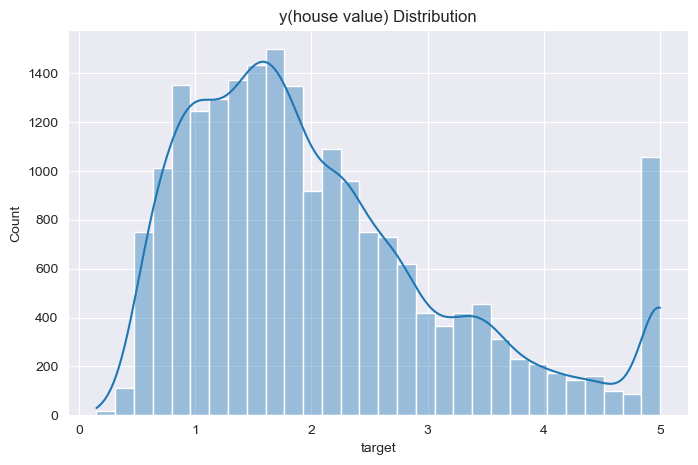

In [6]:
# histogram of the median house value(y)


sns.histplot(y, bins = 30, kde = True, alpha = 0.4)
plt.title('y(house value) Distribution')

<span style = 'color : green'>
I can conclude that the data has low variance in house value as most of the house values fall within the mean range with a few outliers being the exception like the points right of the histogram.

### Part 2 Visualization

#### Scatter plot of the Population vs. House Value(y)

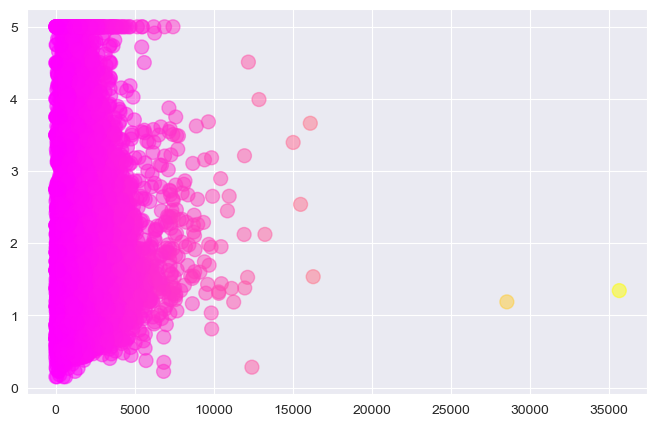

In [7]:
plt.scatter(california_df['Population'], y,c = california_df['Population'], cmap = 'spring', marker = 'o', s = 100, alpha = 0.5)

<span style = 'color:green'>
I can conclude the where there are more population the value of the house are lower than the houses where there is more population. There are instances of ouliters across the range but noticibly there are two significant outliers that are farther away from the avegrage house value which are happen to be located where there is less population.

#### scatter plot of Longitude vs Latitude

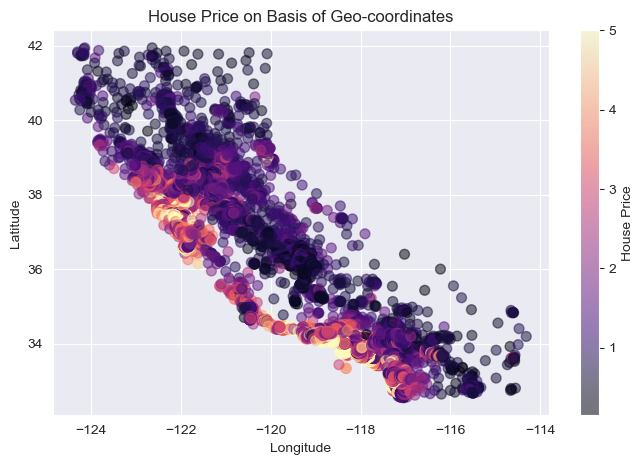

In [8]:
scatter = plt.scatter(california_df['Longitude'], california_df['Latitude'], c=y, cmap='magma', s=50, alpha=0.5)

# labels
plt.title('House Price on Basis of Geo-coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# color bar
cbar = plt.colorbar(scatter)
cbar.set_label('House Price')


plt.show()

<span style = 'color:green'>
Based on the scatter plot created, it is observed that latitude and longitude have a correlation relationship with one another, as indicated by the linear pattern formed in the plot.
There is a slight precence of variance notibly in the lower longitude and higher latitude section of the plot. 
<br>
    
This suggests that as one of these variables changes, the other tends to change in a predictable manner.

### Part 2 Visualization

#### Heatmap of the features

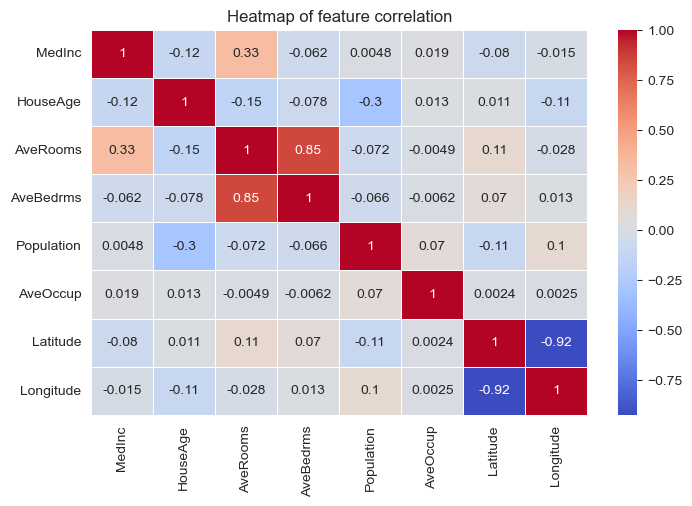

In [9]:
california_df_copy = california_df.copy()

correlation_matrix = california_df_copy.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap of feature correlation')
plt.show()

<span style='color:green'>
It is evident that the heatmap provides a clear visualization of the correlation values between each feature. From the heatmap, we can observe that latitude and longitude have the least correlation with each other. Therefore, we can consider removing these features to potentially improve the model's performance.

#### Scatter plot for ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] vs. house value(y)

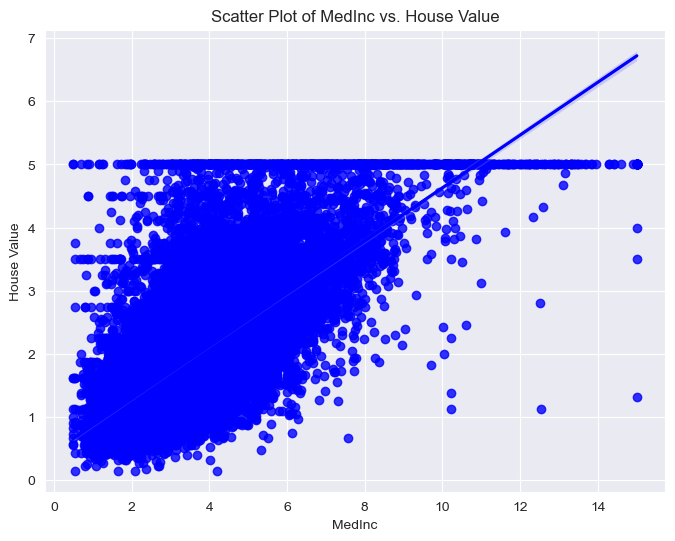

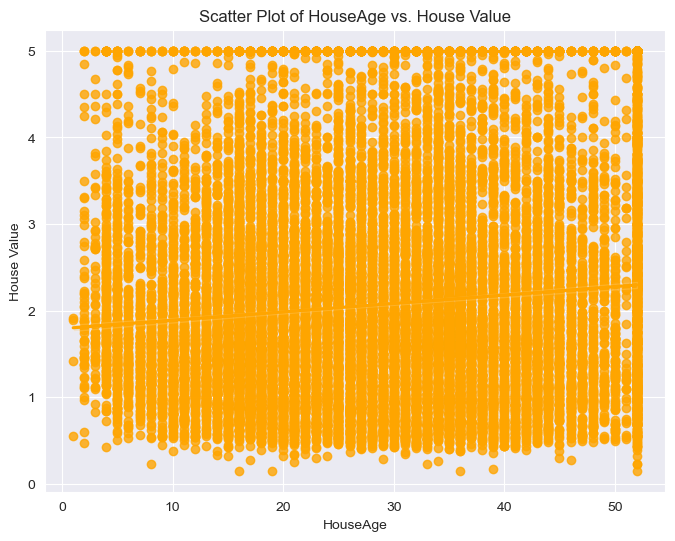

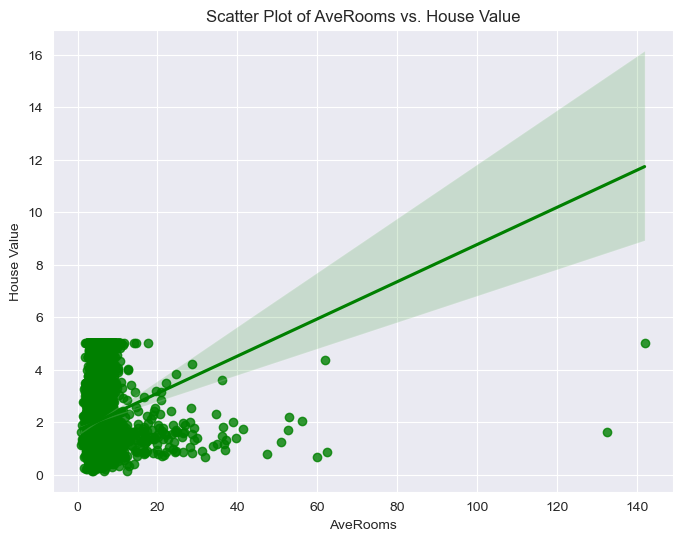

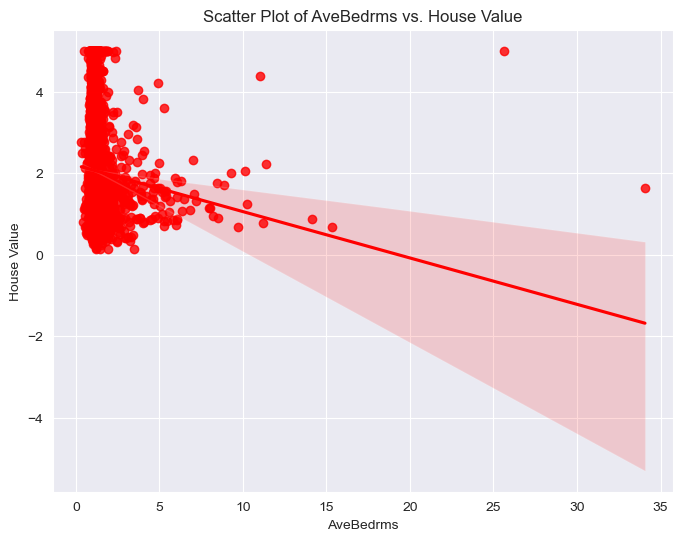

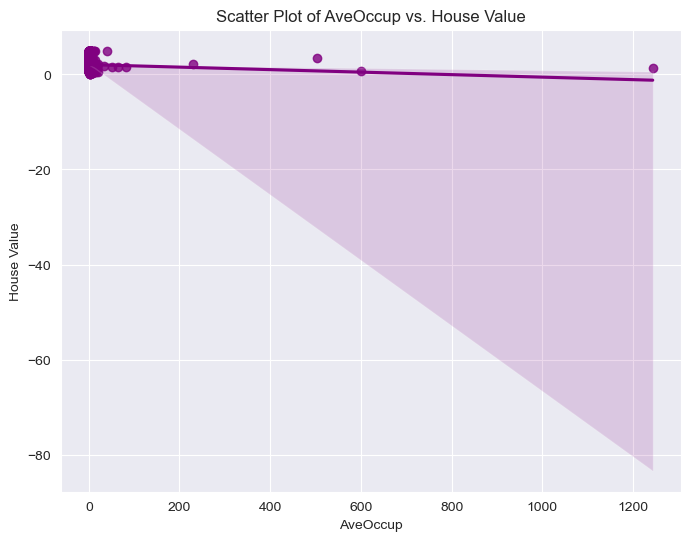

In [12]:
# the chosen features vs house value
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

# colors for plot
colors = ['blue', 'orange', 'green', 'red', 'purple']

# scatter plots using sns.regplot
for feature, color in zip(features, colors):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y=y, data=california_df, scatter_kws={'color': color}, line_kws={'color': color})
    plt.title(f'Scatter Plot of {feature} vs. House Value')
    plt.xlabel(feature)
    plt.ylabel('House Value')
    plt.grid(True)
    plt.show()

<span style = 'color:green'>
The plots suggest that median income and the number of rooms per household are positively correlated with house values, while house age, average bedrooms, and average occupancy do not show a strong linear relationship with house values.

#### Histogram for HouseAge

Text(0.5, 1.0, 'Histogram for HouseAge')

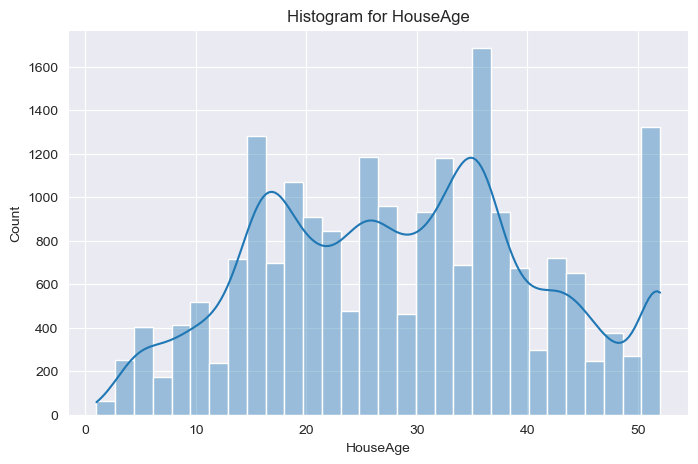

In [22]:
# histogram of the median house value(y)
sns.histplot(california_df['HouseAge'], bins = 30, kde = True, alpha = 0.4)
plt.title('Histogram for HouseAge')

### Part 3 Model Creation and Evaluation

* Perform the following

1. Scale the data

In [28]:
# 1. prepare the data by splitting target and the rest of the features
features = california_df.drop('target', axis=1)
target = california_df['target']

# 2. scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

2. Split your data into a training and testing set (test size of 0.30)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

3. Create a neural network for regression using sklearn (hidden layers of size: 130->64->32->16)

In [32]:
mlp = MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), max_iter=1000,
             random_state=42)

4. Run the test data through the model to obtain predictions

In [33]:
# Run the test data through the model to obtain predictions
predictions = mlp.predict(X_test)

5. R^2 score of this model

In [34]:
r2 = r2_score(y_test, predictions)
print(f'R² of the model: {r2}')

R² of the model: 0.4919013799215838


### Part 3: Model Creation and Evaluation

• How did your model perform? 

In [ ]:
#not so good 

• Try experimenting with different hidden layer sizes.

In [41]:
# to keep consistency while applying the same transformation to both the training and test set, lets use pipeline
# reduce errors

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# expererimenting different layers
param_grid = {
    'mlp__hidden_layer_sizes': [(130,), (130, 64), (130, 64, 32), (130, 64, 32, 16)],
    'mlp__activation': ['relu']
}

# finding the best set of parameters(using gridsearchCV)
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)


print(f'Best parameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f'R² of the model: {r2}')


Best parameters: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (130, 64)}
R² of the model: 0.8027840801006552


In [ ]:
import pandas as pd

# Assuming data is a pandas DataFrame
# data = pd.read_csv('your_data.csv')

# Calculate IQR
Q1 = california.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Assuming X_train is the DataFrame for your features and y_train is the corresponding labels
# Remove outliers from X_train
X_train_no_outliers = remove_outliers_iqr(pd.DataFrame(X_train))
y_train_no_outliers = y_train[X_train_no_outliers.index]

# Set up the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(130,), (130, 64), (130, 64, 32), (130, 64, 32, 16)],
    'mlp__activation': ['relu']
}

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')

# Fit the grid search on the training data without outliers
grid_search.fit(X_train_no_outliers, y_train_no_outliers)

# Output the best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate and print the R² score
r2 = r2_score(y_test, predictions)
print(f'R² of the model: {r2}')


Best parameters: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (130,)}
R² of the model: 0.6544157025537048


In [71]:
# DBSCAN (method 1)

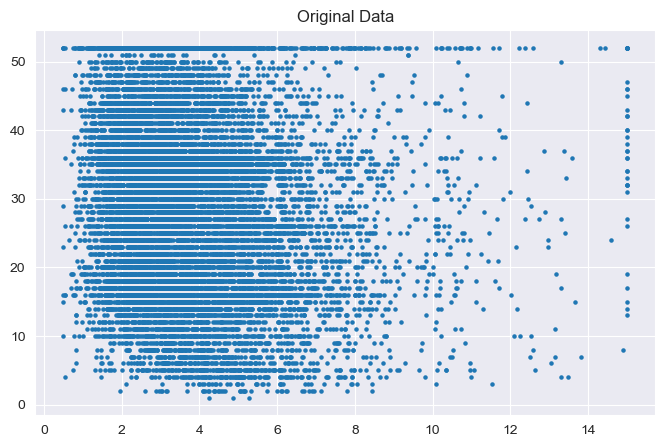

Points removed: 14448 out of 14448
Points removed: 14448 out of 14448
Points removed: 14448 out of 14448
Points removed: 14448 out of 14448


In [66]:
from sklearn.cluster import DBSCAN

# Function to check the number of points removed by DBSCAN with varying parameters
def check_outliers_removal(X, eps=0.5, min_samples=5):
    outlier_remover = DBSCAN(eps=eps, min_samples=min_samples)
    outlier_remover.fit(X)
    mask = outlier_remover.labels_ != -1
    print(f"Points removed: {len(X) - np.sum(mask)} out of {len(X)}")

# Visualize the data (assuming 2D data for simplicity)
def visualize_data(X, title="Data Visualization"):
    plt.scatter(X[:, 0], X[:, 1], s=5)
    plt.title(title)
    plt.show()

# Assuming X_train is defined and is a DataFrame
X_train = pd.DataFrame(X_train)
X_train_np = X_train.to_numpy()

# Visualize the original data
visualize_data(X_train_np, "Original Data")

# Test different DBSCAN parameters
check_outliers_removal(X_train, eps=1.0, min_samples=5)
check_outliers_removal(X_train, eps=1.5, min_samples=5)
check_outliers_removal(X_train, eps=0.5, min_samples=10)
check_outliers_removal(X_train, eps=0.5, min_samples=20)


In [ ]:
# PCA (method 2)

In [70]:
from sklearn.decomposition import PCA

# Assuming X_train and y_train are defined and are NumPy arrays or DataFrames
X_train = pd.DataFrame(X_train)  # Convert to DataFrame if not already
y_train = pd.Series(y_train)  # Convert to Series if not already

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization and distance calculation
X_pca = pca.fit_transform(X_train)

# Calculate the Euclidean distance from the origin in the PCA-transformed space
distance = np.sqrt(np.sum(X_pca**2, axis=1))

# Define a threshold for outliers (e.g., points beyond 3 standard deviations from the mean)
threshold = np.mean(distance) + 3 * np.std(distance)
outliers = distance > threshold

# Filter out the outliers
X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]

# Ensure X_test is also a DataFrame for consistent handling
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test)

# Setup the pipeline with Isolation Forest outlier remover
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(130,), (130, 64), (130, 64, 32), (130, 64, 32, 16)],
    'mlp__activation': ['relu']
}

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')

try:
    grid_search.fit(X_train_no_outliers, y_train_no_outliers)

    # Output the best parameters
    print(f'Best parameters: {grid_search.best_params_}')

    # Use the best model to make predictions on the test set
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    # Calculate and print the R² score
    r2 = r2_score(y_test, predictions)
    print(f'R² of the model: {r2}')
except ValueError as e:
    print(f"Error during grid search: {e}")


Best parameters: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (130, 64)}
R² of the model: 0.7916833996204337


In [ ]:
by viewing at the original data seem to have a lot variation which by removing a lot of datapoints could have potentially reduce the training sample size significantly. After applying PCA

In [ ]:
# DVSCAN: can even worsen down the dimensionality 

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create a simple dataset
data = {'Feature1': [1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
        'Feature2': [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

ValueError: n_samples=7 should be >= n_clusters=8.